# SVM Train and predict with one mechanism 
This workbook is a study in training and evaluating one mechanism from the SVM study. 
[See the main SVM workbook](SVM%20-%20Quick%20and%20Dirty.ipynb)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from pandasql import sqldf
from scripts.random_profiles import RandomProfileGenerator
from scripts.profile_reader import ProfileReader

pd.options.display.max_rows = 5
pd.options.display.max_columns = 300
%matplotlib inline

pqry = lambda q: sqldf(q, globals())

In [2]:
pr = ProfileReader(data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx',  
                       mechanism_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017 - Mechanisms.xlsx')
# read in data. Make column 2-level index, level 0 is system, level 1 ir readout
# row indices are mechanism, agent, concentration
data = pr.parse_profiles()

# Impute missing
grouped = data.groupby(data.index.get_level_values(0).values)
f = lambda x: x.fillna(x.mean())
data = grouped.transform(f)

In [3]:
# convert multiindex columns to flat
data.columns = [':'.join(col).strip() for col in data.columns.values]
data = pqry('''select * from data''')
pqry('''select * from data limit 5''')

,mech,agent,conc,BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR,BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha,BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1,BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I,BrEPI_IL-1b/TNF-a/IFN-g_24:SRB,BrEPI_IL-1b/TNF-a/IFN-g_24:tPA,BrEPI_IL-1b/TNF-a/IFN-g_24:uPA,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CD106/VCAM-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Collagen III,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL10/IP-10,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL8/IL-8,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL9/MIG,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:EGFR,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:M-CSF,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:MMP-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:PAI-I,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Proliferation_72hr,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:SRB,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CCL2/MCP-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CD54/ICAM-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CXCL10/IP-10,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:IL-1alpha,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:MMP-9,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:SRB,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:uPA,HUVEC/PBMC_LPS_24:CCL2/MCP-1,HUVEC/PBMC_LPS_24:CD106/VCAM-1,HUVEC/PBMC_LPS_24:CD142/Tissue Factor,HUVEC/PBMC_LPS_24:CD40,HUVEC/PBMC_LPS_24:CD62E/E-Selectin,HUVEC/PBMC_LPS_24:CXCL8/IL-8,HUVEC/PBMC_LPS_24:IL-1alpha,HUVEC/PBMC_LPS_24:M-CSF,HUVEC/PBMC_LPS_24:sPGE2,HUVEC/PBMC_LPS_24:SRB,HUVEC/PBMC_LPS_24:sTNF-alpha,HUVEC/PBMC_SEB/TSST_24:CCL2/MCP-1,HUVEC/PBMC_SEB/TSST_24:CD38,HUVEC/PBMC_SEB/TSST_24:CD40,HUVEC/PBMC_SEB/TSST_24:CD62E/E-Selectin,HUVEC/PBMC_SEB/TSST_24:CD69,HUVEC/PBMC_SEB/TSST_24:CXCL8/IL-8,HUVEC/PBMC_SEB/TSST_24:CXCL9/MIG,HUVEC/PBMC_SEB/TSST_24:PBMC Cytotoxicity,HUVEC/PBMC_SEB/TSST_24:Proliferation,HUVEC/PBMC_SEB/TSST_24:SRB,HUVEC_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,HUVEC_IL-1b/TNF-a/IFN-g_24:CD54/ICAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD62E/E-Selectin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,HUVEC_IL-1b/TNF-a/IFN-g_24:HLA-DR,HUVEC_IL-1b/TNF-a/IFN-g_24:Proliferation,HUVEC_IL-1b/TNF-a/IFN-g_24:SRB,HUVEC_IL-4/Histamine_24:CCL2/MCP-1,HUVEC_IL-4/Histamine_24:CCL26/Eotaxin-3,HUVEC_IL-4/Histamine_24:CD106/VCAM-1,HUVEC_IL-4/Histamine_24:CD62P/P-selectin,HUVEC_IL-4/Histamine_24:CD87/uPAR,HUVEC_IL-4/Histamine_24:SRB,HUVEC_IL-4/Histamine_24:VEGFR2,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:HLA-DR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:IL-6,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:LDLR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:M-CSF,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Proliferation,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Serum Amyloid A,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:SRB
0,AhR agonist,FICZ,1000 nM,0.031453,0.020148,-0.006715,-0.027737,-0.022183,0.110827,-0.112386,-0.003285,0.102482,0.018481,0.004346,0.074810,-0.035580,0.002161,-0.008596,0.025059,-0.040733,0.051074,-0.111534,0.048148,-0.038960,0.064136,-0.004362,-0.005137,-0.004074,0.041061,0.009954,-0.001147,0.046371,0.001108,0.009104,-0.018277,0.155624,0.015812,-0.016767,0.006921,0.096784,-0.013816,0.028806,-0.028511,-0.139501,-0.002186,-0.017793,0.009821,0.116732,-0.024614,0.131661,-0.008077,-0.012467,-0.044135,-0.018509,-0.012472,-0.018993,0.020808,0.142367,0.034303,0.020455,0.014791,0.087453,-0.008754,-0.013645,-0.088930,-0.019053,0.023189,-0.219655,-0.043045,-0.077100,0.000649,-0.040823,0.043608,-0.013293,-0.016680,0.125897,0.016830

In [4]:
print('Select Mechanism with greatest count ')
# Select Mechanism with greatest count 
pqry('''SELECT mech, count(mech) count FROM data m group by mech order by count(mech) desc LIMIT 1;''')


Select Mechanism with greatest count 


,mech,count
0,mTOR inhibitor,27


In [5]:
# Impute missing
data[75:80]

,mech,agent,conc,BrEPI_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL10/IP-10,BrEPI_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,BrEPI_IL-1b/TNF-a/IFN-g_24:HLA-DR,BrEPI_IL-1b/TNF-a/IFN-g_24:IL-1alpha,BrEPI_IL-1b/TNF-a/IFN-g_24:MMP-1,BrEPI_IL-1b/TNF-a/IFN-g_24:PAI-I,BrEPI_IL-1b/TNF-a/IFN-g_24:SRB,BrEPI_IL-1b/TNF-a/IFN-g_24:tPA,BrEPI_IL-1b/TNF-a/IFN-g_24:uPA,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CD106/VCAM-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Collagen III,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL10/IP-10,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL8/IL-8,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:CXCL9/MIG,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:EGFR,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:M-CSF,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:MMP-1,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:PAI-I,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:Proliferation_72hr,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:SRB,HDFn_IL-1b/TNF-a/IFN-g/EGF/FGF/PDGFbb_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CCL2/MCP-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CD54/ICAM-1,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:CXCL10/IP-10,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:IL-1alpha,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:MMP-9,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:SRB,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:TIMP-2,HEK/HDFn_IL-1b/TNF-a/IFN-g/TGF-b_24:uPA,HUVEC/PBMC_LPS_24:CCL2/MCP-1,HUVEC/PBMC_LPS_24:CD106/VCAM-1,HUVEC/PBMC_LPS_24:CD142/Tissue Factor,HUVEC/PBMC_LPS_24:CD40,HUVEC/PBMC_LPS_24:CD62E/E-Selectin,HUVEC/PBMC_LPS_24:CXCL8/IL-8,HUVEC/PBMC_LPS_24:IL-1alpha,HUVEC/PBMC_LPS_24:M-CSF,HUVEC/PBMC_LPS_24:sPGE2,HUVEC/PBMC_LPS_24:SRB,HUVEC/PBMC_LPS_24:sTNF-alpha,HUVEC/PBMC_SEB/TSST_24:CCL2/MCP-1,HUVEC/PBMC_SEB/TSST_24:CD38,HUVEC/PBMC_SEB/TSST_24:CD40,HUVEC/PBMC_SEB/TSST_24:CD62E/E-Selectin,HUVEC/PBMC_SEB/TSST_24:CD69,HUVEC/PBMC_SEB/TSST_24:CXCL8/IL-8,HUVEC/PBMC_SEB/TSST_24:CXCL9/MIG,HUVEC/PBMC_SEB/TSST_24:PBMC Cytotoxicity,HUVEC/PBMC_SEB/TSST_24:Proliferation,HUVEC/PBMC_SEB/TSST_24:SRB,HUVEC_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,HUVEC_IL-1b/TNF-a/IFN-g_24:CD54/ICAM-1,HUVEC_IL-1b/TNF-a/IFN-g_24:CD62E/E-Selectin,HUVEC_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,HUVEC_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,HUVEC_IL-1b/TNF-a/IFN-g_24:HLA-DR,HUVEC_IL-1b/TNF-a/IFN-g_24:Proliferation,HUVEC_IL-1b/TNF-a/IFN-g_24:SRB,HUVEC_IL-4/Histamine_24:CCL2/MCP-1,HUVEC_IL-4/Histamine_24:CCL26/Eotaxin-3,HUVEC_IL-4/Histamine_24:CD106/VCAM-1,HUVEC_IL-4/Histamine_24:CD62P/P-selectin,HUVEC_IL-4/Histamine_24:CD87/uPAR,HUVEC_IL-4/Histamine_24:SRB,HUVEC_IL-4/Histamine_24:VEGFR2,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CCL2/MCP-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD106/VCAM-1,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD141/Thrombomodulin,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD142/Tissue Factor,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CD87/uPAR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL8/IL-8,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:CXCL9/MIG,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:HLA-DR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:IL-6,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:LDLR,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:M-CSF,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Proliferation,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:Serum Amyloid A,CASMC_HCL_IL-1b/TNF-a/IFN-g_24:SRB
75,HDAC inhibitor,Scriptaid,370.4 nM,-0.076612,0.034877,-0.000263,-0.043693,0.000339,-0.027887,0.014458,-0.000808,0.183085,-0.089200,-0.133475,-0.165537,-0.122668,0.003348,-0.030063,-0.136353,0.034072,-0.001216,-0.047831,-0.214047,-0.027018,-0.023269,-0.020482,0.020295,0.013915,0.041436,-0.009538,-0.005869,-0.054989,-0.047902,-0.028699,-0.053771,-0.027701,-0.038767,-0.031290,-0.000108,-0.080809,-0.121783,-0.033856,-0.003580,-0.647514,0.046309,-0.146581,-0.003253,0.199833,-0.001711,0.124583,-0.001801,-0.032304,-0.267673,0.010673,0.023688,-0.000806,0.067109,0.032913,0.047723,0.175068,-0.063466,0.031112,0.040770,-0.029753,-0.128460,-0.022841,0.030668,-0.006178,0.003596,-0.041531,0.008476,-0.013020,0.027741,-0.036015,-0.1182

In [6]:
# read in list of mechanisms:
mechanisms = pqry('''SELECT distinct mech from data''').values.ravel()

In [7]:
# Generate positive class from current mechanism
# set mechanism under study. We can look over other mechanisms on this model.
mechanism = 'mTOR inhibitor'

# establish positive class data. We'll compare this against the negative class generated as random profiles.
pos_class = data.loc[data.mech == mechanism].drop(columns=['agent', 'conc'])
#pos_class

### Generate Random profile
We need negative class data to train the model [See random Profiles example](Print Random Profiles.ipynb)

In [8]:
# Generate negative class
# Initialize the random profile genearator with sig env values and profile data file for S:M
#random_profile_number = 317
random_profile_number=len(pos_class)
envelope=RandomProfileGenerator.TRUSTED 
conf=RandomProfileGenerator._95
np.random.seed(42) # ensure reprodicble results

rpg = RandomProfileGenerator(envelope_file='data\\SigEnvelopeFile.xml', data_file='data\\Final_Berg JBS 2013 Supplemental Table 3_For SVM14Dec2017.xlsx')
neg_values = rpg.get_random_profiles(prof_num=random_profile_number, envelope=envelope,conf=conf, dist='rand')
neg_mech = pd.DataFrame({'mech': ['neg_class' for s in range(random_profile_number)]})
neg_class = pd.concat([neg_mech, neg_values], axis=1)
#neg_class 

In [9]:
# Generate all classes by combining positive and negative classes
all_class = pd.concat([pos_class, neg_class]).reset_index(drop=True)

# encode mechanism to int values
all_class['mech'] = all_class['mech'].map({mechanism:1, 'neg_class':0})

In [10]:
X = all_class.iloc[:,1:]
Y = all_class.iloc[:,0]

# scale profiles with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [11]:
# test train split
from sklearn.model_selection import train_test_split



# Split the data into tarining and testing set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.1, 
                                                    random_state = 42,
                                                    stratify = Y # startify, so we get the same proportion in train and test
                                                   )

# Split the data into tarining and testing set
X_train, X_cv, y_train, y_cv = train_test_split(    X_train, 
                                                    y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 42,
                                                    stratify = y_train # startify, so we get the same proportion in train and test
                                                   )



#features_train, features_cv, labels_train, labels_cv = train_test_split(features_train, 
#                                                                            labels_train, 
#                                                                            test_size = 0.1, 
#                                                                            random_state = 0)
print("Training set has {} samples.".format(X_train.shape[0]))
#print("Cross validation set has {} samples.".format(features_cv.shape[0]))
print("Testing  set has {} samples.".format(X_cv.shape[0]))



Training set has 38 samples.
Testing  set has 10 samples.


In [12]:
print("Proportion of positive class in training set: ", sum(y_train) / len(y_train))
print("Proportion of positive class in testing set: {:.3f}".format(sum(y_cv) / len(y_cv)))

Proportion of positive class in training set:  0.5
Proportion of positive class in testing set: 0.500


In [13]:
# Naive Predictor
model_pred = np.ones(len(Y), dtype=int)


TP = np.sum(Y) # Counting the ones as this is the naive case.
FP = Y.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP / float(TP + FP) 
recall = TP / float(TP + FN)
precision = TP / float(TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
from sklearn.metrics import fbeta_score
fscore =  fbeta_score(Y, model_pred, beta=0.5)

# Print the results 
print( "Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5000, F-score: 0.5556]


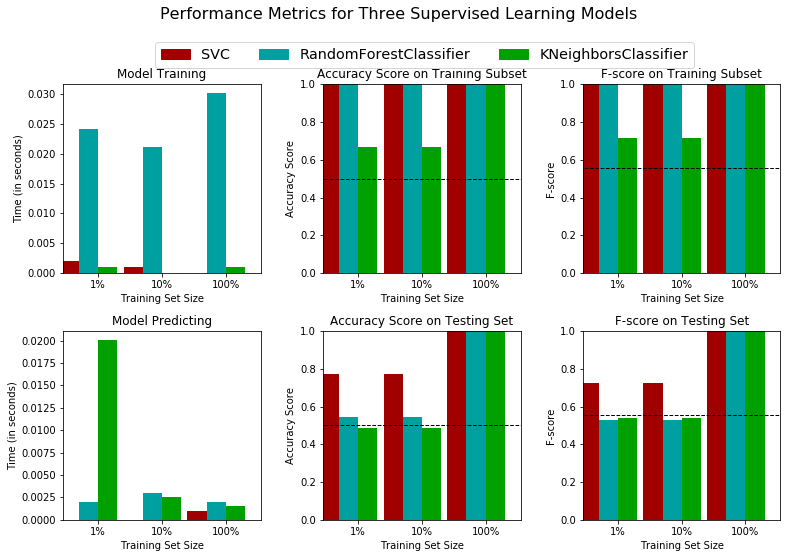

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scripts.visuals as vs

# Initialize the three models
clf_A = SVC(kernel='linear')
clf_B = RandomForestClassifier(random_state=0) 
clf_C = KNeighborsClassifier(n_neighbors=3)
#clf_C = DecisionTreeClassifier(random_state=0)
#clf_C = RandomForestClassifier(random_state=0)


# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_100 = 1.0
samples_10 = 0.1
samples_1 = 0.1

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        vs.train_predict2(clf, samples, X_train, y_train, X_cv, y_cv)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [16]:
# GridSearch
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score

# Initialize the classifier
clf = SVC(kernel='linear', random_state=42)
#parameters = { 'C':[0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}
parameters = { 'C':[0.1, 0.5, 1.0, 2.0, 5.0]}


# Make an fbeta_score scoring object using make_scorer()
#scorer = make_scorer(accuracy_score)
scorer = make_scorer(fbeta_score, beta=0.5)


# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)


# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)


# Report the before-and-afterscores
print ( "Unoptimized model\n------")
print ( "Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ( "F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ( "\nOptimized Model\n------")
print ( "Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ( "Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print ( "grid_fit.best_params_:", grid_fit.best_params_)

Unoptimized model
------
Accuracy score on testing data: 1.0000
F-score on testing data: 1.0000

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000
grid_fit.best_params_: {'C': 0.1}


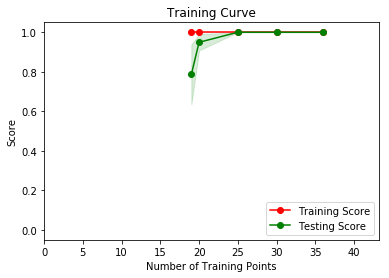

In [22]:
from sklearn.model_selection import StratifiedKFold
import sklearn.model_selection as curves

import matplotlib.pyplot as plt


K = 2
data_size = random_profile_number + len(pos_class)

ts_min = (len(neg_class) + 1) / K


cv = StratifiedKFold(n_splits=3, shuffle=False, random_state=42)
train_sizes=[ 19, 20, 25, 30, 36]
#train_sizes=[19, 20, 25, 30, 36, 100, 200, 229]


#train_sizes, train_scores, valid_scores = learning_curve( best_clf, X, Y, cv = sk, train_sizes=[ 20, 50, 75, 84])

 # Calculate the training and testing scores
sizes, train_scores, test_scores = curves.learning_curve(best_clf, X, Y, 
                                                         #cv = cv, 
                                                         train_sizes = train_sizes, 
                                                         scoring = 'f1') # f1

# Find the mean and standard deviation for smoothing
train_std = np.std(train_scores, axis = 1)
train_mean = np.mean(train_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)


# Subplot the learning curve 
ax = plt.subplot()
ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
ax.fill_between(sizes, train_mean - train_std, \
    train_mean + train_std, alpha = 0.15, color = 'r')
ax.fill_between(sizes, test_mean - test_std, \
    test_mean + test_std, alpha = 0.15, color = 'g')

# Labels
ax.set_title('Training Curve')
ax.set_xlabel('Number of Training Points')
ax.set_ylabel('Score')
ax.set_xlim([0, X.shape[0]*0.8])
ax.set_ylim([-0.05, 1.05])

# Visual aesthetics
plt.legend(loc = 'lower right')
plt.ylim([-0.05,1.05])
plt.show()

### Analysis
Looking at the training curve we could benefit from sore training examples. http://scikit-learn.org/stable/modules/learning_curve.html#learning-curve

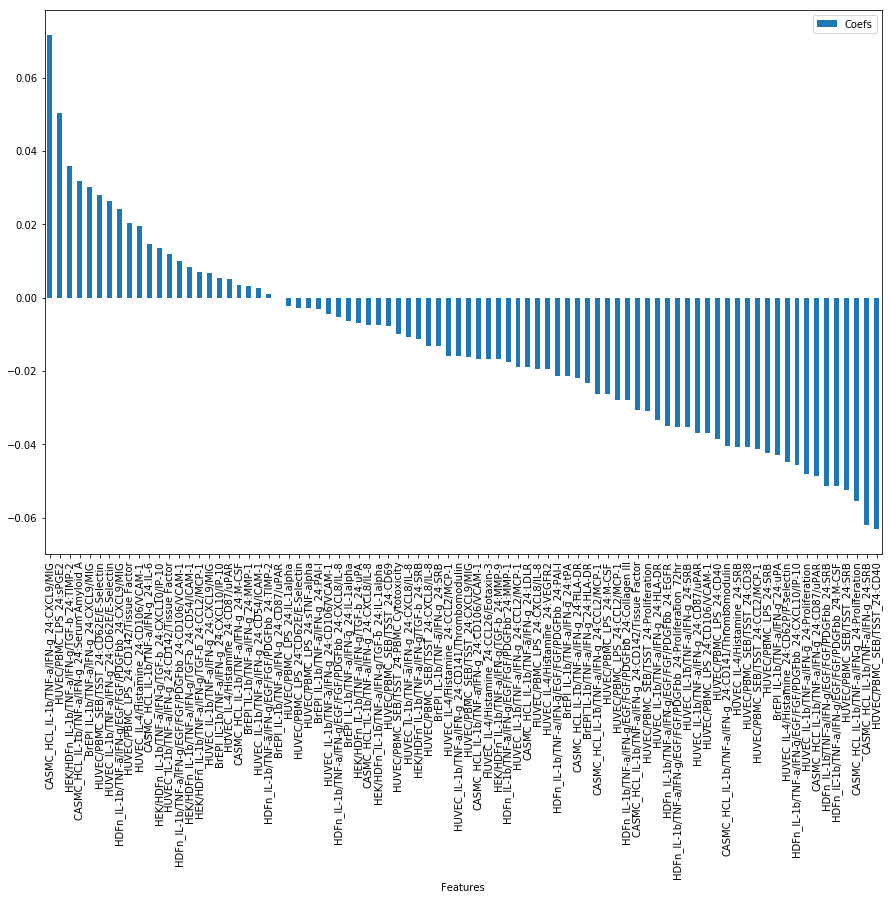

In [18]:
coef_data = pd.DataFrame(
{
    'Features': data.columns.values[3:],
    'Coefs': best_clf.coef_[0]

}
)

pqry('''select * from coef_data order by Coefs desc''').plot.bar(x='Features', figsize=(15,10));


In [19]:
# predict a negative class
target_mechanism = 'mTOR inhibitor'

# establish positive class data. We'll compare this against the negative class generated as random profiles.
